In [1]:
import numpy as np
import pandas as pd

# Load the data

## NY Times

In [2]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
df = pd.read_csv(url)

In [3]:
df['date'] = pd.to_datetime(df['date']) # Changing variable type of date
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


The **fips** code can be used for getting the location info for the plots. Rest are self-understandable.

## Wikipedia population data

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population'
pop_df = pd.read_html(url)[0]

In [5]:
pop_df.head()

Rank              State         Census population                   \
  Current 2010         State Estimate, July 1, 2019[8] April 1, 2010[9]   
0     1.0  1.0    California                  39512223         37253956   
1     2.0  2.0         Texas                  28995881         25145561   
2     3.0  4.0       Florida                  21477737         18801310   
3     4.0  3.0      New York                  19453561         19378102   
4     5.0  6.0  Pennsylvania                  12801989         12702379   

  Change, 2010–2019             Total U.S. House of Representatives Seats  \
    Percent[note 3]    Absolute Total U.S. House of Representatives Seats   
0              6.1%  +2,257,700                                        53   
1             15.3%  +3,850,320                                        36   
2             14.2%  +2,676,427                                        27   
3              0.4%     +75,459                                        27   
4              0.8%     +99,610                                        18   

  Estimated population per electoral vote, 2019[note 1]  \
  Estimated population per electoral vote, 2019[note 1]   
0                                             718404      
1                                             763050      
2                                             740611      
3                                             670812      
4                                             640099      

  Census population per House seat          \
                   Estimated, 2019    2010   
0                           745514  702885   
1                           805441  698503   
2                           795472  696468   
3                           720502  717707   
4                           711222  705715   

  Percent of the total U.S. population, 2019[note 2]  
  Percent of the total U.S. population, 2019[note 2]  
0                                             11.91%  
1                                              8.74%  
2                                              6.47%  
3                                              5.86%  
4                                              3.86%

In [6]:
pop_df = pop_df.iloc[:,2:4]
pop_df = pop_df.droplevel(0, axis=1)
pop_df.head()

,State,"Estimate, July 1, 2019[8]"
0,California,39512223
1,Texas,28995881
2,Florida,21477737
3,New York,19453561
4,Pennsylvania,12801989


### Pre-processing population data

In [7]:
# Checking states names that are same before merging

s_df = set(df.state.unique())
s_pop = set(pop_df.State)

intersect = s_df.intersection(s_pop)
intersect = list(intersect)
print(f'For {len(intersect)} states, the names are common.')

print(f'\nState names in population data not common are:')
for state in s_pop.difference(intersect):
    print(state)
print(f'\nState names in COVID-19 data not common are:')
for state in s_df.difference(intersect):
    print(state)

For 54 states, the names are common.

State names in population data not common are:
Fifty states + D.C.
Contiguous United States
Total U.S. (including D.C. and territories)
The fifty states
U.S. Virgin Islands
American Samoa

State names in COVID-19 data not common are:
Virgin Islands


Changing the name in pop_df to `Virgin Islands` and processing the population data for our use

In [8]:
import re
import warnings
warnings.filterwarnings("ignore")

def pre_process(total_pop):
    '''Pre-process population values where in some cases the references might 
    have '...[..]' pattern signifying reference
    '''
    try:
        num = int(total_pop)
    except:
        m = re.match(r'\d+[\d+]', total_pop)
        num = int(m.group(0))

    return num

pop_df.rename(columns={pop_df.columns[1]: 'Recent_population'}, inplace=True)

pop_df['Recent_population'] = pop_df['Recent_population'].apply(pre_process)

# pop_df[pop_df.State == 'U.S. Virgin Islands'].State = 'Virgin Islands'
pop_df.replace('U.S. Virgin Islands', 'Virgin Islands', inplace=True)

pop_df.head()

,State,Recent_population
0,California,39512223
1,Texas,28995881
2,Florida,21477737
3,New York,19453561
4,Pennsylvania,12801989


## Merging and computing

In [15]:
data = pd.merge(df, pop_df, left_on='state', right_on='State')

In [18]:
data['cases_per_capita'] = data.cases / data.Recent_population
data['deaths_per_capita'] = data.deaths / data.Recent_population

data.drop(columns=['State'], inplace=True)
data.head()

,date,state,fips,cases,deaths,Recent_population,cases_per_capita,deaths_per_capita
0,2020-01-21,Washington,53,1,0,7614893,1.313216e-07,0.0
1,2020-01-22,Washington,53,1,0,7614893,1.313216e-07,0.0
2,2020-01-23,Washington,53,1,0,7614893,1.313216e-07,0.0
3,2020-01-24,Washington,53,1,0,7614893,1.313216e-07,0.0
4,2020-01-25,Washington,53,1,0,7614893,1.313216e-07,0.0


# Analysis

 ## State-wise Analysis
 
 Let's analyze the growth pattern across various states

In [20]:
temp = data[data.state == 'Washington']

In [25]:
def daily_counts(colname):
    
    df['daily_' + colname] = df.cases.diff()
    df['daily_' + colname].iloc[0] = df[colname].iloc[0] 
    return df

,date,state,fips,cases,deaths,Recent_population,cases_per_capita,deaths_per_capita,daily_cases
0,2020-01-21,Washington,53,1,0,7614893,1.313216e-07,0.0,1.0
1,2020-01-22,Washington,53,1,0,7614893,1.313216e-07,0.0,0.0
2,2020-01-23,Washington,53,1,0,7614893,1.313216e-07,0.0,0.0
3,2020-01-24,Washington,53,1,0,7614893,1.313216e-07,0.0,0.0
4,2020-01-25,Washington,53,1,0,7614893,1.313216e-07,0.0,0.0


In [13]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [16]:
state_df = df.groupby('state')

In [21]:
state_df.count()

,date,fips,cases,deaths
state,,,,
Alabama,187,187,187,187
Alaska,188,188,188,188
Arizona,234,234,234,234
Arkansas,189,189,189,189
California,235,235,235,235
Colorado,195,195,195,195
Connecticut,192,192,192,192
Delaware,189,189,189,189
District of Columbia,193,193,193,193


In [17]:
state_df.plot.bar()

C:\Users\ksmai\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


state
Alabama                     AxesSubplot(0.125,0.11;0.775x0.77)
Alaska                      AxesSubplot(0.125,0.11;0.775x0.77)
Arizona                     AxesSubplot(0.125,0.11;0.775x0.77)
Arkansas                    AxesSubplot(0.125,0.11;0.775x0.77)
California                  AxesSubplot(0.125,0.11;0.775x0.77)
Colorado                    AxesSubplot(0.125,0.11;0.775x0.77)
Connecticut                 AxesSubplot(0.125,0.11;0.775x0.77)
Delaware                    AxesSubplot(0.125,0.11;0.775x0.77)
District of Columbia        AxesSubplot(0.125,0.11;0.775x0.77)
Florida                     AxesSubplot(0.125,0.11;0.775x0.77)
Georgia                     AxesSubplot(0.125,0.11;0.775x0.77)
Guam                        AxesSubplot(0.125,0.11;0.775x0.77)
Hawaii                      AxesSubplot(0.125,0.11;0.775x0.77)
Idaho                       AxesSubplot(0.125,0.11;0.775x0.77)
Illinois                    AxesSubplot(0.125,0.11;0.775x0.77)
Indiana                     AxesSubplot(0.125,0.1

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002CD7B1B61F8> (for post_execute):


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

state
Alabama                     AxesSubplot(0.125,0.125;0.775x0.755)
Alaska                      AxesSubplot(0.125,0.125;0.775x0.755)
Arizona                     AxesSubplot(0.125,0.125;0.775x0.755)
Arkansas                    AxesSubplot(0.125,0.125;0.775x0.755)
California                  AxesSubplot(0.125,0.125;0.775x0.755)
Colorado                    AxesSubplot(0.125,0.125;0.775x0.755)
Connecticut                 AxesSubplot(0.125,0.125;0.775x0.755)
Delaware                    AxesSubplot(0.125,0.125;0.775x0.755)
District of Columbia        AxesSubplot(0.125,0.125;0.775x0.755)
Florida                     AxesSubplot(0.125,0.125;0.775x0.755)
Georgia                     AxesSubplot(0.125,0.125;0.775x0.755)
Guam                        AxesSubplot(0.125,0.125;0.775x0.755)
Hawaii                      AxesSubplot(0.125,0.125;0.775x0.755)
Idaho                       AxesSubplot(0.125,0.125;0.775x0.755)
Illinois                    AxesSubplot(0.125,0.125;0.775x0.755)
Indiana            

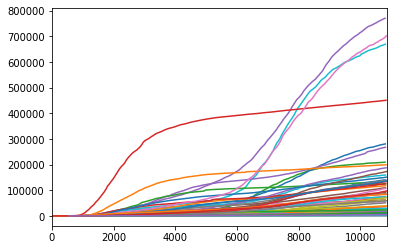

In [23]:
state_df['cases'].plot()